In [ ]:
# ✅ 1. 런타임 재시작 후 패키지 설치 (순서 중요!)
!pip uninstall transformers tokenizers -y
!pip install torch torchvision torchaudio
!pip install transformers==4.44.2 datasets accelerate tokenizers==0.19.1 --no-cache-dir
!pip install sentencepiece

Found existing installation: transformers 4.54.1
Uninstalling transformers-4.54.1:
  Successfully uninstalled transformers-4.54.1
Found existing installation: tokenizers 0.21.4
Uninstalling tokenizers-0.21.4:
  Successfully uninstalled tokenizers-0.21.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import sys
print("Python version:", sys.version)

# ✅ 2. 패키지 버전 확인
import transformers
import datasets
print(f"transformers: {transformers.__version__}")
print(f"datasets: {datasets.__version__}")

Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
transformers: 4.54.1
datasets: 4.0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ✅ 3. 데이터 증강 (기존 파일 + 고품질 증강)
import pandas as pd
import random
import numpy as np
import os

try:
    # merged_dataset.csv 파일 로드
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/merged_dataset.csv")
    print(f"📂 기존 파일 데이터: {len(df)}")
    print(f"📊 기존 데이터 라벨 분포:")
    print(df['label'].value_counts())

    # 기존 데이터 샘플 확인
    print(f"\n🔍 기존 데이터 샘플:")
    print(df.head(10))

except FileNotFoundError:
    print("⚠️ merged_dataset.csv 파일을 찾을 수 없습니다.")
    print("🔄 샘플 데이터로 대체합니다...")

    # 샘플 데이터 생성 (파일이 없는 경우)
    sample_data = {
        'text': [
            '사랑해', '고마워', '좋은 하루', '안녕하세요', '감사합니다',
            'ㅅㅂ', '씨발', '개새끼', '병신', '지랄'
        ],
        'label': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
    }
    df = pd.DataFrame(sample_data)
    print(f"📂 샘플 데이터: {len(df)}")

📂 기존 파일 데이터: 5197
📊 기존 데이터 라벨 분포:
label
0    2798
1    2399
Name: count, dtype: int64

🔍 기존 데이터 샘플:
                                                text  label
0  부랴부랴 왔는데 아무도 안왔네. 시간개념들이 없네 맞아. 사람들이 진짜 개념이없다 ...      1
1  인방 보는 남자는 거르는게 맞다 특히 벗방보는 애들은 진짜 거세 시켜야함 볼 게 없...      0
2  댓글에 빠순이들 몰려와서 즈그 주인님 쉴드치는 꼴 좀 봐 이래서 인방충~ 인방충~ ...      1
3  솔직히 여자 48kg이상은 나가 디져야 하는 거 아님 그렇게 따지면 남자 170cm...      1
4         중국은 두 발달린 짐승 짐승입장도 들어봐야지ㅋㅋ 짱깨는 반드시 해체되어야 함      1
5  윤석열이 이제 급하긴 한가보네 깐부라고 부르기까지 하다니 언제는 홍어준표 역선택이라...      1
6  어머니 간 이식 해 주기 싫어서 도망쳤다고...? 해 준 거 없는 부모한테는 간 이...      1
7  와 드디어 일 다 했다 줫빠지게 힘들어서 잣같았다 그동안 고생 많았어 고생한 기념으...      0
8  이번에 한문철 유뷰트 봤는데, 3차선에서 역주행하는 차가 있데 한 번 보여줘봐 저렇...      0
9  저게 좌파 정당 대표인지 우파 정당 대표인지 분간이 안 가네. 리준석 까면 틀딱 각...      1


In [ ]:
print(f"\n🚀 고품질 증강 데이터 생성...")

# 1. 정상 문장 - 실제 사용되는 표현들 (시발점 문제 해결!)
high_quality_normal = [
    # 시발점 정상 사용 (핵심!)
    "새로운 시발점을 만들어보자", "이것이 나의 시발점이다", "인생의 시발점",
    "성공의 시발점", "시발점에서 출발하자", "좋은 시발점이 될 것이다",
    "오늘이 새로운 시발점이야", "시발점이 중요해", "시발점을 찾았다",
    "프로젝트의 시발점", "변화의 시발점", "도약의 시발점", "시발점부터 다시",
    "인생의 새로운 시발점", "성장의 시발점", "꿈의 시발점", "희망의 시발점",

    # 개발 관련 정상 사용
    "개발자로 일하고 있어요", "개발 공부 중입니다", "개념을 이해했어요",
    "개선점을 찾아보자", "개인적으로 생각해요", "개방적인 마인드",
    "개별적으로 처리하자", "개체수가 늘었다", "개요를 정리해보자",
    "웹개발", "앱개발", "게임개발", "개발팀", "개발환경", "개발도구",

    # 병원/질병 정상 사용
    "병원에 가야겠어요", "병이 나았습니다", "감기 병에 걸렸어요",
    "병든 나무를 치료하자", "마음의 병", "현대인의 병", "지병이 있어요",
    "병원 예약", "병원비", "병원 진료", "병실", "병동", "응급병원",

    # 지식/공부 정상 사용
    "지금 공부하고 있어요", "지식이 늘었네요", "지혜로운 선택이야",
    "지난번에 말했듯이", "지속적으로 노력하자", "지금까지 수고했어요",
    "지금 상황", "지금부터", "지금 생각해보니", "지금 당장", "지금 여기서",

    # 일상 대화
    "안녕하세요", "감사합니다", "수고하셨습니다", "좋은 하루 되세요",
    "잘 지내세요", "반갑습니다", "고생하셨어요", "화이팅", "파이팅",
    "좋아요", "괜찮아요", "훌륭해요", "멋져요", "완벽해요", "최고예요",
]

# 2. 명확한 욕설 - 문맥상 확실한 것들
high_quality_toxic = [
    # 시발 욕설 (문맥상 명확)
    "시발 뭐야", "시발 왜그래", "아 시발", "시발 몰라", "시발 짜증나",
    "시발 개열받네", "시발아", "시발 진짜", "시발 모르겠다",

    # 기타 욕설
    "ㅅㅂ 짜증나", "씨발 뭐야", "ㅆㅂ 진짜",
    "병신같네", "병신아", "진짜 병신", "ㅄ같다", "ㅄ아",
    "지랄하네", "지랄하지마", "개지랄", "ㅈㄹ하네",
    "개새끼", "개놈", "개년", "개같은놈",
    "좆같네", "좆까", "ㅈ같다", "좆밥",
    "꺼져", "닥쳐", "죽어", "뒤져",
    "개빡쳐", "존나 싫어", "개열받네", "개빡돈다",
]

# 3. 자연스러운 변형 생성
def create_natural_variations(sentences, label, max_variations=3):
    """자연스러운 변형 생성"""
    augmented = []

    for sentence in sentences:
        # 원본 추가
        augmented.append({"text": sentence, "label": label, "source": "high_quality"})

        # 자연스러운 변형들
        variations = []
        if label == 0:  # 정상 문장
            variations = [
                sentence + " 정말요",
                sentence + "ㅎㅎ",
                "정말 " + sentence,
                sentence + " 좋아요",
                sentence.replace("요", "") if sentence.endswith("요") else sentence,
            ]
        else:  # 욕설
            variations = [
                sentence + " 진짜",
                sentence + "ㅜㅜ",
                "아 " + sentence,
                sentence.replace(" ", ""),
                sentence + " 개짜증",
            ]

        # 변형 추가 (최대 max_variations개)
        for var in variations[:max_variations]:
            if var != sentence and len(var.strip()) > 0:
                augmented.append({"text": var, "label": label, "source": "variation"})

    return augmented

# 고품질 데이터 생성
print("📊 정상 문장 증강...")
normal_augmented = create_natural_variations(high_quality_normal, 0, 2)

print("📊 욕설 문장 증강...")
toxic_augmented = create_natural_variations(high_quality_toxic, 1, 2)



🚀 고품질 증강 데이터 생성...
📊 정상 문장 증강...
📊 욕설 문장 증강...


In [ ]:
# ==================== 기존 방식 증강 (보완용) ====================

print("📊 기본 패턴 증강...")

# 욕설 패턴 (기존 코드 유지하되 시발점 고려)
toxic_patterns = [
    'ㅅㅂ', 'ㅆㅂ', '씨발', 'ㅄ', '병신', '개새끼',
    '지랄', '개지랄', '좆', 'ㅈㄹ', '개놈', '년놈'
    # '시발' 제거 - 문맥 고려 필요
]

# 변형 생성 (기존 방식)
expanded_words = []
for pattern in toxic_patterns:
    for i in range(50):  # 개수 줄임 (품질 > 양)
        variations = [
            pattern + str(random.randint(1, 99)),
            pattern + '임',
            pattern + '아',
            '개' + pattern if not pattern.startswith('개') else pattern,
        ]
        expanded_words.extend(variations)

# 중복 제거
expanded_words = list(set(expanded_words))[:3000]  # 개수 조정
df_toxic_basic = pd.DataFrame({"text": expanded_words, "label": 1})

# 정상 문장 기본 생성
normal_patterns = [
    '사랑해', '고마워', '안녕', '좋은하루', '감사해',
    '반가워', '잘지내', '수고해', '화이팅', '좋아해'
]
normal_sentences = []
for pattern in normal_patterns:
    for i in range(300):  # 개수 조정
        variations = [
            pattern + f" {i}",
            f"정말 {pattern}",
            f"{pattern} 많이",
            f"항상 {pattern}",
        ]
        normal_sentences.extend(variations)

df_normal_basic = pd.DataFrame({"text": normal_sentences[:3000], "label": 0})


📊 기본 패턴 증강...


In [ ]:
# ==================== 모든 데이터 병합 ====================

# 고품질 데이터를 DataFrame으로 변환
df_normal_hq = pd.DataFrame(normal_augmented)
df_toxic_hq = pd.DataFrame(toxic_augmented)

# 모든 데이터 병합
df_all = pd.concat([
    df,                 # 기존 파일 데이터
    df_normal_hq,       # 고품질 정상 데이터
    df_toxic_hq,        # 고품질 욕설 데이터
    df_normal_basic,    # 기본 정상 증강
    df_toxic_basic      # 기본 욕설 증강
], ignore_index=True)

print(f"\n📂 최종 학습 데이터: {len(df_all)}")

# 라벨 분포 확인
print("📊 라벨 분포:")
label_counts = df_all['label'].value_counts()
print(label_counts)
print(f"정상:욕설 비율 = {label_counts[0]}:{label_counts[1]} ({label_counts[0]/label_counts[1]:.1f}:1)")

# 데이터 소스별 분포 (있는 경우)
if 'source' in df_all.columns:
    print(f"\n📊 데이터 소스 분포:")
    print(df_all['source'].value_counts())


📂 최종 학습 데이터: 9020
📊 라벨 분포:
label
0    6011
1    3009
Name: count, dtype: int64
정상:욕설 비율 = 6011:3009 (2.0:1)

📊 데이터 소스 분포:
source
variation       216
high_quality    108
Name: count, dtype: int64


In [ ]:
# ✅ 4. KoBERT 로드 (에러 처리 추가)
import torch
from datasets import Dataset as HFDataset
from transformers import AutoTokenizer, BertForSequenceClassification, TrainingArguments, Trainer

try:
    # KoBERT 토크나이저와 모델 로드
    tokenizer = AutoTokenizer.from_pretrained("monologg/kobert", trust_remote_code=True)
    model = BertForSequenceClassification.from_pretrained("monologg/kobert", num_labels=2, trust_remote_code=True)
    print("✅ KoBERT 모델 로드 성공")
except Exception as e:
    print(f"❌ KoBERT 로드 실패: {e}")
    # 대안: 일반 BERT 사용
    print("🔄 일반 BERT 모델로 대체...")
    tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
    model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
    print("✅ 대안 모델 로드 성공")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/kobert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ KoBERT 모델 로드 성공


In [ ]:
# ✅ 5. 데이터셋 준비
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        truncation=True,
        padding='max_length',
        max_length=64
    )

# HuggingFace Dataset으로 변환
dataset = HFDataset.from_pandas(df_all)
dataset = dataset.map(tokenize_function, batched=True)
dataset = dataset.rename_column("label", "labels")

# 필요한 컬럼만 선택
dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# 학습/검증 분할
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = dataset["train"]
test_dataset = dataset["test"]

print(f"📊 학습 데이터: {len(train_dataset)}")
print(f"📊 검증 데이터: {len(test_dataset)}")

Map:   0%|          | 0/9020 [00:00<?, ? examples/s]

📊 학습 데이터: 7216
📊 검증 데이터: 1804


In [ ]:
# ✅ 6. 학습 설정 (메모리 최적화)
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,  # 에포크 줄임
    per_device_train_batch_size=8,  # 배치 크기 줄임
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=2,  # 그래디언트 누적
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir="./logs",
    eval_strategy="epoch",  # evaluation_strategy → eval_strategy
    save_strategy="epoch",
    logging_steps=100,
    save_total_limit=1,
    report_to=[],
    load_best_model_at_end=True,
    dataloader_pin_memory=False,  # 메모리 절약
    fp16=True,  # Mixed precision 사용
)

In [ ]:
# ✅ 7. 트레이너 설정 및 학습
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

print("🚀 학습 시작...")
trainer.train()
print("✅ 학습 완료!")

🚀 학습 시작...


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Epoch,Training Loss,Validation Loss
1,0.085200,0.067074
2,0.042100,0.079140


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ 학습 완료!


In [ ]:
# 정리 셀 - 먼저 실행하세요
import shutil
import os

# 기존 마운트 포인트들 정리
mount_points = ['/content/drive', '/content/gdrive', '/content/my_drive', '/content/google_drive']

for mount_point in mount_points:
    if os.path.exists(mount_point):
        try:
            # 마운트 해제 시도
            os.system(f'fusermount -u {mount_point} 2>/dev/null')
            # 폴더 삭제
            shutil.rmtree(mount_point)
            print(f"✅ {mount_point} 정리 완료")
        except Exception as e:
            print(f"⚠️ {mount_point} 정리 중 오류: {e}")
    else:
        print(f"📁 {mount_point} 존재하지 않음")

print("🧹 마운트 포인트 정리 완료!")

✅ /content/drive 정리 완료
📁 /content/gdrive 존재하지 않음
📁 /content/my_drive 존재하지 않음
📁 /content/google_drive 존재하지 않음
🧹 마운트 포인트 정리 완료!


In [ ]:
# ✅ 8. 모델 저장
import os
import pickle

# 저장 디렉토리 생성
save_dir = "/content/drive/Colab Notebooks/kobert_toxic_classifier"
os.makedirs(save_dir, exist_ok=True)

try:
    # 모델 저장 (일반적으로 문제없음)
    model.save_pretrained(save_dir)
    print("✅ 모델 저장 완료!")

    # KoBERT 토크나이저 저장 문제 해결
    try:
        # 방법 1: 직접 pickle로 저장
        with open(f"{save_dir}/tokenizer.pkl", "wb") as f:
            pickle.dump(tokenizer, f)
        print("✅ 토크나이저 pickle 저장 완료!")

    except Exception as e1:
        print(f"⚠️ pickle 저장 실패: {e1}")
        try:
            # 방법 2: 토크나이저 속성만 저장
            torch.save({
                'tokenizer_vocab': tokenizer.vocab,
                'tokenizer_class': tokenizer.__class__.__name__,
            }, f"{save_dir}/tokenizer_data.pth")
            print("✅ 토크나이저 데이터 저장 완료!")

        except Exception as e2:
            print(f"⚠️ 토크나이저 데이터 저장도 실패: {e2}")
            print("📝 토크나이저는 메모리에서만 사용됩니다.")

    # 전체 체크포인트 저장 (가장 안전한 방법)
    torch.save({
        'model_state_dict': model.state_dict(),
        'model_config': model.config,
    }, f"{save_dir}/complete_model.pth")
    print("✅ 전체 모델 체크포인트 저장 완료!")

except Exception as e:
    print(f"❌ 저장 실패: {e}")
    print("🔄 임시 저장으로 대체...")
    torch.save(model.state_dict(), "/content/drive/Colab Notebooks/model_weights_only.pth")
    print("💾 모델 가중치만 저장 완료!")

print("💾 저장 과정 완료!")

✅ 모델 저장 완료!
✅ 토크나이저 pickle 저장 완료!
✅ 전체 모델 체크포인트 저장 완료!
💾 저장 과정 완료!


In [ ]:
# ✅ 9. 예측 함수
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def predict(text):
    """텍스트가 욕설인지 예측"""
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=64
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    pred = torch.argmax(probs, dim=1).item()
    confidence = probs[0][pred].item()

    result = "욕설" if pred == 1 else "정상"
    return f"{result} (신뢰도: {confidence:.2f})"

In [ ]:
# ✅ 10. 테스트
print("\n🔍 예측 테스트:")
test_sentences = [
    "사랑해",
    "와 넌 진짜 답이 없다",
    "그정도면 노예 아니냐?",
    "이게 나의 시발점이야",
    "너 진짜 암걸린다",
    "ㅅㅂ 진짜",
    "고마워",
    "씨@발 왜그래",
    "좋은 하루 되세요",
    "개짜증나",
    "감사합니다",
    "ㅄ같네"
]

for sentence in test_sentences:
    prediction = predict(sentence)
    print(f"[{sentence}] → {prediction}")

print("\n🎉 모든 작업 완료!")


🔍 예측 테스트:
[사랑해] → 정상 (신뢰도: 1.00)
[와 넌 진짜 답이 없다] → 욕설 (신뢰도: 0.98)
[그정도면 노예 아니냐?] → 욕설 (신뢰도: 0.98)
[이게 나의 시발점이야] → 정상 (신뢰도: 1.00)
[너 진짜 암걸린다] → 욕설 (신뢰도: 0.98)
[ㅅㅂ 진짜] → 욕설 (신뢰도: 1.00)
[고마워] → 정상 (신뢰도: 1.00)
[씨@발 왜그래] → 욕설 (신뢰도: 1.00)
[좋은 하루 되세요] → 정상 (신뢰도: 1.00)
[개짜증나] → 욕설 (신뢰도: 1.00)
[감사합니다] → 정상 (신뢰도: 1.00)
[ㅄ같네] → 욕설 (신뢰도: 1.00)

🎉 모든 작업 완료!


🚀 KoBERT 욕설 분류기 종합 성능 평가
💻 사용 디바이스: cuda
📊 테스트 데이터셋: 43개 샘플
🔍 모델 성능 측정 시작...


예측 중:   0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
예측 중: 100%|██████████| 2/2 [00:00<00:00, 40.69it/s]

📊 전체 성능 지표:
   정확도 (Accuracy): 0.9070
   정밀도 (Precision): 0.9232
   재현율 (Recall): 0.9070
   F1-Score: 0.9072
   AUC-ROC: 0.9934

🎯 카테고리별 성능 분석:
📂 sibal_distinction:
   정확도: 100.00% (9/9)
   ✅ 모두 정확!

📂 gae_distinction:
   정확도: 100.00% (7/7)
   ✅ 모두 정확!

📂 byeong_distinction:
   정확도: 60.00% (3/5)
   ❌ 오분류: '병이 나았다' (실제:0, 예측:1), '감기 병' (실제:0, 예측:1)

📂 ji_distinction:
   정확도: 100.00% (5/5)
   ✅ 모두 정확!

📂 normal_general:
   정확도: 100.00% (6/6)
   ✅ 모두 정확!

📂 clear_toxic:
   정확도: 100.00% (7/7)
   ✅ 모두 정확!

📂 boundary_cases:
   정확도: 50.00% (2/4)
   ❌ 오분류: '병 같은 날씨' (실제:0, 예측:1), '개인차 있어' (실제:0, 예측:1)




/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50837 (\N{HANGUL SYLLABLE YOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/

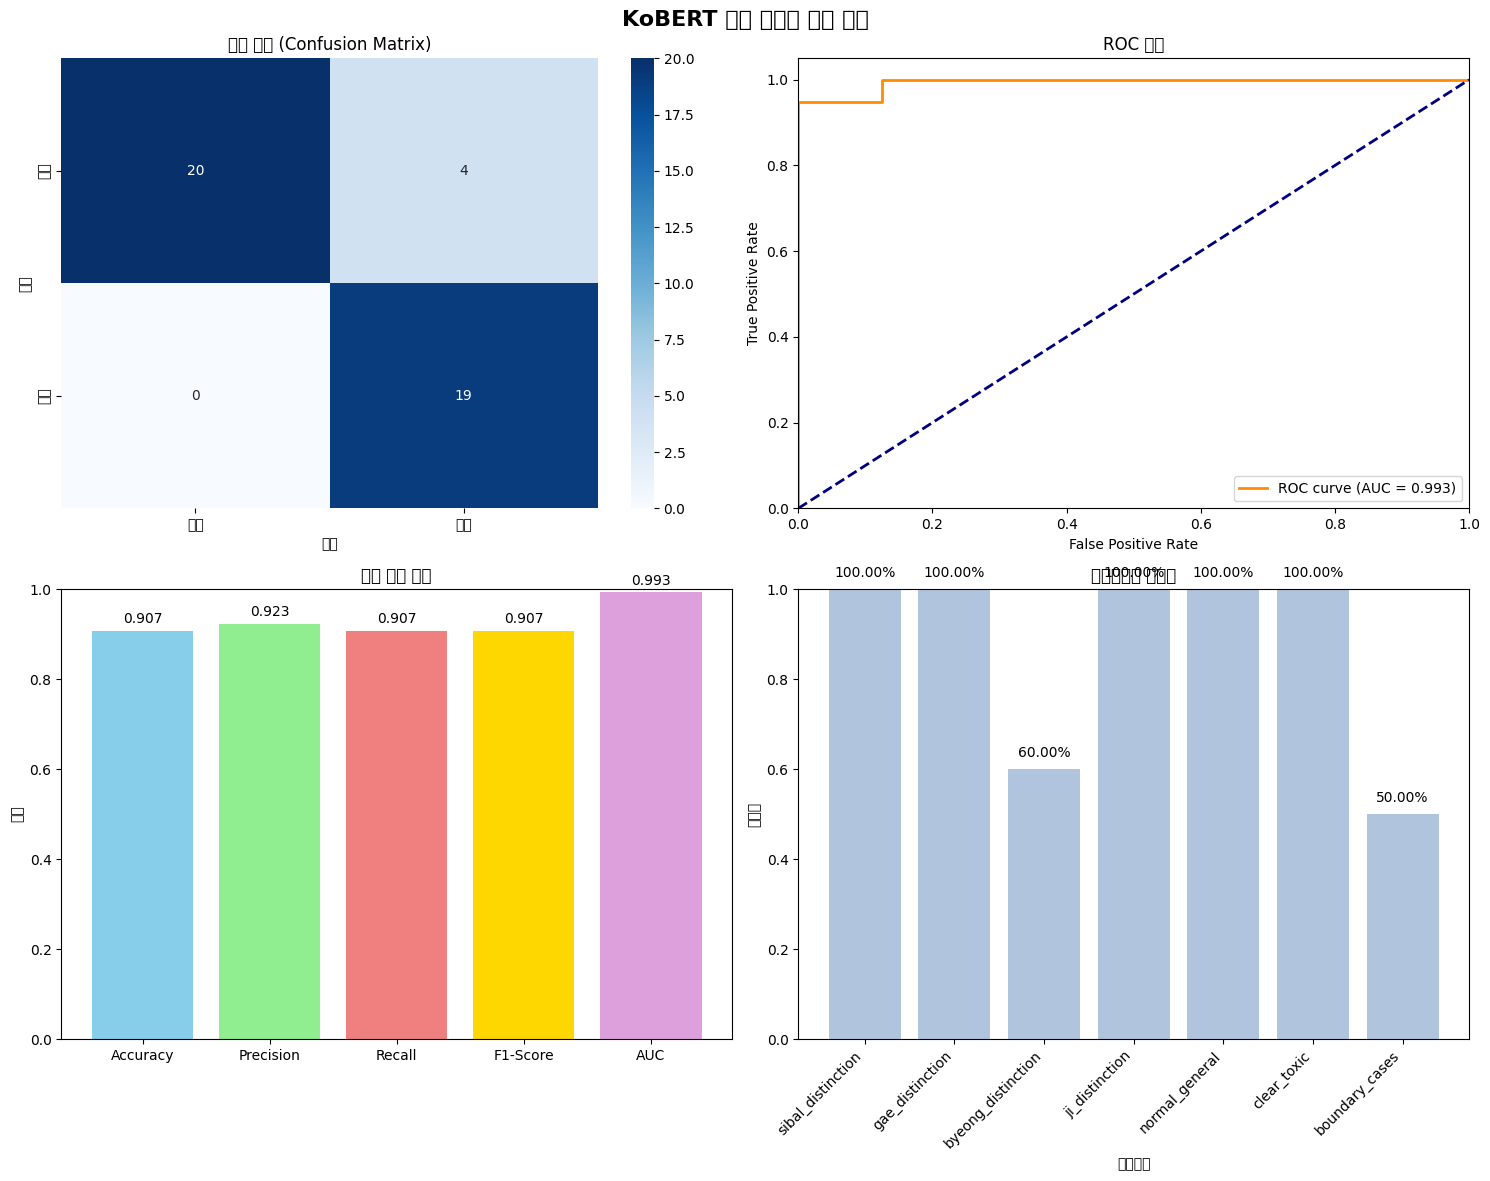


⚡ 추론 속도 측정 (샘플 수: 1000)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


📊 단일 추론 평균 시간: 12.40ms
📊 단일 추론 처리량: 80.6 sentences/sec

📊 배치별 처리 성능:
   배치 크기  1:   14.1ms,   70.7 sent/sec
   배치 크기  8:   14.0ms,  573.4 sent/sec
   배치 크기 16:   13.9ms, 1149.9 sent/sec
   배치 크기 32:   15.1ms, 2113.5 sent/sec
   배치 크기 64:   17.1ms, 3751.7 sent/sec

🎯 핵심 케이스 상세 분석:
[시발점이 중요해] → 정상 (신뢰도: 0.999)
[오늘이 새로운 시발점이야] → 정상 (신뢰도: 0.999)
[시발 왜그래] → 욕설 (신뢰도: 0.998)
[개발자입니다] → 정상 (신뢰도: 0.999)
[개새끼같네] → 욕설 (신뢰도: 0.997)
[병원에 갔어요] → 정상 (신뢰도: 0.999)
[병신같네] → 욕설 (신뢰도: 0.997)

🎉 종합 성능 평가 완료!


In [ ]:
# ✅ KoBERT 욕설 분류기 성능 측정

import torch
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

# ==================== 1. 테스트 데이터셋 준비 ====================

def create_test_dataset():
    """실제 사용 케이스를 반영한 테스트 데이터셋"""

    test_cases = {
        # 🎯 핵심 테스트: 시발점 vs 시발 구분
        "sibal_distinction": [
            {"text": "오늘이 내 시발점이야", "label": 0, "category": "시발점_정상"},
            {"text": "새로운 시발점을 만들자", "label": 0, "category": "시발점_정상"},
            {"text": "인생의 시발점", "label": 0, "category": "시발점_정상"},
            {"text": "시발점이 중요해", "label": 0, "category": "시발점_정상"},
            {"text": "성공의 시발점", "label": 0, "category": "시발점_정상"},

            {"text": "시발 왜그래", "label": 1, "category": "시발_욕설"},
            {"text": "아 시발 짜증나", "label": 1, "category": "시발_욕설"},
            {"text": "시발 모르겠다", "label": 1, "category": "시발_욕설"},
            {"text": "시발 개열받네", "label": 1, "category": "시발_욕설"},
        ],

        # 🔍 개발 관련 정상 vs 욕설 구분
        "gae_distinction": [
            {"text": "개발자가 되었다", "label": 0, "category": "개발_정상"},
            {"text": "개념을 이해했다", "label": 0, "category": "개발_정상"},
            {"text": "개선점을 찾았다", "label": 0, "category": "개발_정상"},
            {"text": "개인적으로 생각해", "label": 0, "category": "개발_정상"},

            {"text": "개새끼 같네", "label": 1, "category": "개_욕설"},
            {"text": "개짜증나", "label": 1, "category": "개_욕설"},
            {"text": "개놈아", "label": 1, "category": "개_욕설"},
        ],

        # 🏥 병원 vs 병신 구분
        "byeong_distinction": [
            {"text": "병원에 갔다", "label": 0, "category": "병원_정상"},
            {"text": "병이 나았다", "label": 0, "category": "병원_정상"},
            {"text": "감기 병", "label": 0, "category": "병원_정상"},

            {"text": "병신같네", "label": 1, "category": "병신_욕설"},
            {"text": "진짜 병신", "label": 1, "category": "병신_욕설"},
        ],

        # 📚 지식 vs 지랄 구분
        "ji_distinction": [
            {"text": "지금 공부 중", "label": 0, "category": "지식_정상"},
            {"text": "지식이 늘었다", "label": 0, "category": "지식_정상"},
            {"text": "지혜로운 선택", "label": 0, "category": "지식_정상"},

            {"text": "지랄하네", "label": 1, "category": "지랄_욕설"},
            {"text": "개지랄", "label": 1, "category": "지랄_욕설"},
        ],

        # ✨ 일반 정상 문장
        "normal_general": [
            {"text": "안녕하세요", "label": 0, "category": "일반_정상"},
            {"text": "감사합니다", "label": 0, "category": "일반_정상"},
            {"text": "좋은 하루 되세요", "label": 0, "category": "일반_정상"},
            {"text": "수고하셨습니다", "label": 0, "category": "일반_정상"},
            {"text": "사랑해요", "label": 0, "category": "일반_정상"},
            {"text": "고마워요", "label": 0, "category": "일반_정상"},
        ],

        # 💀 명확한 욕설
        "clear_toxic": [
            {"text": "ㅅㅂ 짜증나", "label": 1, "category": "명확_욕설"},
            {"text": "씨발 뭐야", "label": 1, "category": "명확_욕설"},
            {"text": "ㅆㅂ", "label": 1, "category": "명확_욕설"},
            {"text": "ㅄ같다", "label": 1, "category": "명확_욕설"},
            {"text": "좆같네", "label": 1, "category": "명확_욕설"},
            {"text": "꺼져", "label": 1, "category": "명확_욕설"},
            {"text": "닥쳐", "label": 1, "category": "명확_욕설"},
        ],

        # 🤔 애매한 경계 케이스
        "boundary_cases": [
            {"text": "개빡쳐", "label": 1, "category": "경계_케이스"},
            {"text": "병 같은 날씨", "label": 0, "category": "경계_케이스"},
            {"text": "지금 열받아", "label": 0, "category": "경계_케이스"},
            {"text": "개인차 있어", "label": 0, "category": "경계_케이스"},
        ]
    }

    # 모든 테스트 케이스를 하나의 리스트로 합치기
    all_tests = []
    for category, cases in test_cases.items():
        all_tests.extend(cases)

    return pd.DataFrame(all_tests), test_cases

# ==================== 2. 성능 측정 함수 ====================

def evaluate_model_performance(model, tokenizer, test_df, device):
    """모델 성능 종합 평가"""

    print("🔍 모델 성능 측정 시작...")

    # 예측 수행
    predictions, probabilities, actual_labels = predict_batch(
        model, tokenizer, test_df['text'].tolist(), test_df['label'].tolist(), device
    )

    # 기본 메트릭 계산
    accuracy = accuracy_score(actual_labels, predictions)
    precision = precision_score(actual_labels, predictions, average='weighted')
    recall = recall_score(actual_labels, predictions, average='weighted')
    f1 = f1_score(actual_labels, predictions, average='weighted')
    auc = roc_auc_score(actual_labels, probabilities)

    print(f"📊 전체 성능 지표:")
    print(f"   정확도 (Accuracy): {accuracy:.4f}")
    print(f"   정밀도 (Precision): {precision:.4f}")
    print(f"   재현율 (Recall): {recall:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print(f"   AUC-ROC: {auc:.4f}")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'predictions': predictions,
        'probabilities': probabilities,
        'actual_labels': actual_labels
    }

def predict_batch(model, tokenizer, texts, labels, device, batch_size=32):
    """배치 단위로 예측 수행"""

    model.eval()
    all_predictions = []
    all_probabilities = []

    with torch.no_grad():
        for i in tqdm(range(0, len(texts), batch_size), desc="예측 중"):
            batch_texts = texts[i:i+batch_size]

            # 토크나이징
            inputs = tokenizer(
                batch_texts,
                return_tensors="pt",
                truncation=True,
                padding=True,
                max_length=64
            )
            inputs = {k: v.to(device) for k, v in inputs.items()}

            # 예측
            outputs = model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
            predictions = torch.argmax(probs, dim=1)

            # CPU로 이동
            all_predictions.extend(predictions.cpu().numpy())
            all_probabilities.extend(probs[:, 1].cpu().numpy())  # 욕설 확률

    return all_predictions, all_probabilities, labels

# ==================== 3. 카테고리별 성능 분석 ====================

def analyze_category_performance(test_df, predictions, test_categories):
    """카테고리별 성능 분석"""

    print(f"\n🎯 카테고리별 성능 분석:")
    print("="*60)

    category_results = {}

    for category, cases in test_categories.items():
        if not cases:
            continue

        # 해당 카테고리의 인덱스 찾기
        category_indices = []
        for i, row in test_df.iterrows():
            if any(case['text'] == row['text'] for case in cases):
                category_indices.append(i)

        if not category_indices:
            continue

        # 카테고리별 예측 결과
        cat_actual = test_df.iloc[category_indices]['label'].tolist()
        cat_predictions = [predictions[i] for i in category_indices]

        # 정확도 계산
        correct = sum(1 for a, p in zip(cat_actual, cat_predictions) if a == p)
        accuracy = correct / len(cat_actual) if cat_actual else 0

        category_results[category] = {
            'accuracy': accuracy,
            'total': len(cat_actual),
            'correct': correct
        }

        print(f"📂 {category}:")
        print(f"   정확도: {accuracy:.2%} ({correct}/{len(cat_actual)})")

        # 틀린 케이스 출력
        wrong_cases = []
        for i, (actual, pred, idx) in enumerate(zip(cat_actual, cat_predictions, category_indices)):
            if actual != pred:
                text = test_df.iloc[idx]['text']
                wrong_cases.append(f"'{text}' (실제:{actual}, 예측:{pred})")

        if wrong_cases:
            print(f"   ❌ 오분류: {', '.join(wrong_cases)}")
        else:
            print(f"   ✅ 모두 정확!")
        print()

    return category_results

# ==================== 4. 시각화 함수 ====================

def plot_performance_charts(results, test_df, category_results):
    """성능 결과 시각화"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    plt.suptitle('KoBERT 욕설 분류기 성능 분석', fontsize=16, fontweight='bold')

    # 1. 혼동 행렬
    cm = confusion_matrix(results['actual_labels'], results['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
    axes[0,0].set_title('혼동 행렬 (Confusion Matrix)')
    axes[0,0].set_xlabel('예측')
    axes[0,0].set_ylabel('실제')
    axes[0,0].set_xticklabels(['정상', '욕설'])
    axes[0,0].set_yticklabels(['정상', '욕설'])

    # 2. ROC 곡선
    fpr, tpr, _ = roc_curve(results['actual_labels'], results['probabilities'])
    axes[0,1].plot(fpr, tpr, color='darkorange', lw=2,
                   label=f'ROC curve (AUC = {results["auc"]:.3f})')
    axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0,1].set_xlim([0.0, 1.0])
    axes[0,1].set_ylim([0.0, 1.05])
    axes[0,1].set_xlabel('False Positive Rate')
    axes[0,1].set_ylabel('True Positive Rate')
    axes[0,1].set_title('ROC 곡선')
    axes[0,1].legend(loc="lower right")

    # 3. 메트릭 비교
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
    values = [results['accuracy'], results['precision'], results['recall'],
              results['f1'], results['auc']]

    bars = axes[1,0].bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
    axes[1,0].set_title('성능 지표 종합')
    axes[1,0].set_ylabel('점수')
    axes[1,0].set_ylim([0, 1])

    # 막대 위에 값 표시
    for bar, value in zip(bars, values):
        axes[1,0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                       f'{value:.3f}', ha='center', va='bottom')

    # 4. 카테고리별 정확도
    if category_results:
        categories = list(category_results.keys())
        accuracies = [category_results[cat]['accuracy'] for cat in categories]

        bars = axes[1,1].bar(range(len(categories)), accuracies, color='lightsteelblue')
        axes[1,1].set_title('카테고리별 정확도')
        axes[1,1].set_xlabel('카테고리')
        axes[1,1].set_ylabel('정확도')
        axes[1,1].set_xticks(range(len(categories)))
        axes[1,1].set_xticklabels(categories, rotation=45, ha='right')
        axes[1,1].set_ylim([0, 1])

        # 정확도 값 표시
        for i, (bar, acc) in enumerate(zip(bars, accuracies)):
            axes[1,1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
                           f'{acc:.2%}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# ==================== 5. 속도 성능 측정 ====================

def measure_inference_speed(model, tokenizer, device, num_samples=1000):
    """추론 속도 측정"""

    print(f"\n⚡ 추론 속도 측정 (샘플 수: {num_samples})")

    # 테스트 문장들
    test_sentences = [
        "안녕하세요", "시발점이 중요해", "개발자입니다", "병원에 갔어요",
        "시발 왜그래", "개새끼", "병신", "지랄하네"
    ] * (num_samples // 8 + 1)
    test_sentences = test_sentences[:num_samples]

    model.eval()

    # 단일 추론 속도
    single_times = []
    for sentence in test_sentences[:100]:  # 100개로 테스트
        start_time = time.time()

        inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True, max_length=64)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            _ = torch.nn.functional.softmax(outputs.logits, dim=-1)

        single_times.append(time.time() - start_time)

    # 배치 추론 속도
    batch_sizes = [1, 8, 16, 32, 64]
    batch_results = {}

    for batch_size in batch_sizes:
        batch_sentences = test_sentences[:batch_size]

        start_time = time.time()

        inputs = tokenizer(batch_sentences, return_tensors="pt", truncation=True,
                          padding=True, max_length=64)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            _ = torch.nn.functional.softmax(outputs.logits, dim=-1)

        elapsed = time.time() - start_time
        throughput = batch_size / elapsed

        batch_results[batch_size] = {
            'time': elapsed,
            'throughput': throughput
        }

    # 결과 출력
    avg_single_time = np.mean(single_times) * 1000  # ms로 변환
    print(f"📊 단일 추론 평균 시간: {avg_single_time:.2f}ms")
    print(f"📊 단일 추론 처리량: {1000/avg_single_time:.1f} sentences/sec")

    print(f"\n📊 배치별 처리 성능:")
    for batch_size, result in batch_results.items():
        print(f"   배치 크기 {batch_size:2d}: {result['time']*1000:6.1f}ms, {result['throughput']:6.1f} sent/sec")

# ==================== 6. 종합 실행 함수 ====================

def run_comprehensive_evaluation():
    """종합 성능 평가 실행"""

    print("🚀 KoBERT 욕설 분류기 종합 성능 평가")
    print("="*60)

    # 디바이스 설정
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"💻 사용 디바이스: {device}")

    # 모델이 이미 학습되어 있다고 가정 (model, tokenizer 전역 변수)
    if 'model' not in globals() or 'tokenizer' not in globals():
        print("❌ 먼저 모델을 학습하고 model, tokenizer 변수를 설정해주세요!")
        return

    model.to(device)
    model.eval()

    # 테스트 데이터셋 생성
    test_df, test_categories = create_test_dataset()
    print(f"📊 테스트 데이터셋: {len(test_df)}개 샘플")

    # 전체 성능 평가
    results = evaluate_model_performance(model, tokenizer, test_df, device)

    # 카테고리별 성능 분석
    category_results = analyze_category_performance(test_df, results['predictions'], test_categories)

    # 시각화
    plot_performance_charts(results, test_df, category_results)

    # 속도 측정
    measure_inference_speed(model, tokenizer, device)

    # 핵심 케이스 상세 분석
    print(f"\n🎯 핵심 케이스 상세 분석:")
    print("="*40)

    key_cases = [
        "시발점이 중요해",
        "오늘이 새로운 시발점이야",
        "시발 왜그래",
        "개발자입니다",
        "개새끼같네",
        "병원에 갔어요",
        "병신같네"
    ]

    for text in key_cases:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=64)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
            pred = torch.argmax(probs, dim=1).item()
            confidence = probs[0][pred].item()

        result = "정상" if pred == 0 else "욕설"
        print(f"[{text}] → {result} (신뢰도: {confidence:.3f})")

    print(f"\n🎉 종합 성능 평가 완료!")

    return results, category_results

# ==================== 7. 실행 ====================

# 성능 측정 실행
if __name__ == "__main__":
    results, category_results = run_comprehensive_evaluation()